## Qualitative Analysis for Base Event Log (Event Log with some Randomness)

Implemented decision points with guards:

- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 800
    - Request Standard Approval if total_price <= 1000
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 400 and random_exponential(100, 200) > 100
    - Otherwise Manager Approval
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 400 and random_exponential(100, 200) > 100
    - Otherwise Standard Approval

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### First, look which machine learning guard has the highest performance for a decision point.

In [2]:
event_log_base = import_log(os.path.join(os.getcwd(), "..", 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  verbose = False)

decision_points = list(dpn_base.decision_points)
decision_points

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[({'create purchase order'}, {'request standard approval', 'request manager approval'}),
 ({'request standard approval'}, {'approve purchase', 'reject purchase'}),
 ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})]

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001D28C4E62F0>


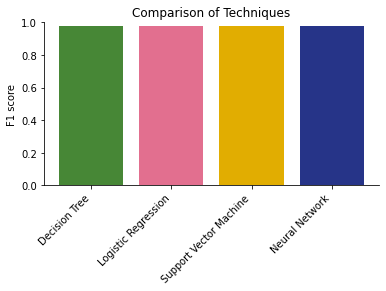

In [3]:
print("Decision point: ", decision_points[0])
dpn_base.guard_manager_per_place[decision_points[0]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[0])
print("Best guard:", best_guard)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001D28C4E5A80>


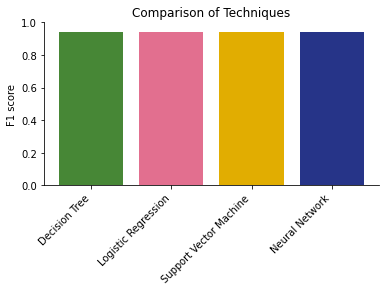

In [4]:
print("Decision point: ", decision_points[1])
dpn_base.guard_manager_per_place[decision_points[1]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[1])
print("Best guard:", best_guard)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001D28C4E5DE0>


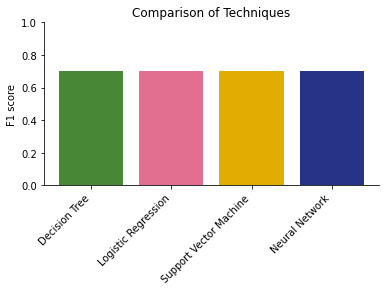

In [5]:
print("Decision point: ", decision_points[2])
dpn_base.guard_manager_per_place[decision_points[2]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[2])
print("Best guard:", best_guard)

### Decision Tree

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


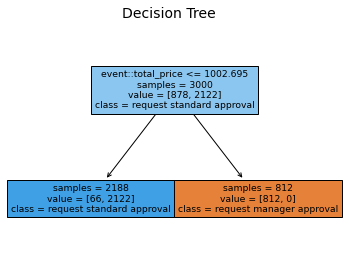

In [6]:
print("Decision point: ", decision_points[0])
dt_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


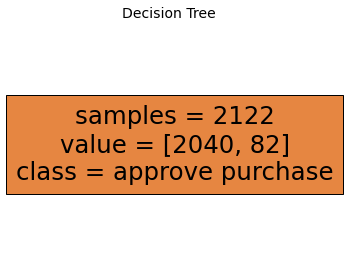

In [7]:
print("Decision point: ", decision_points[1])
dt_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


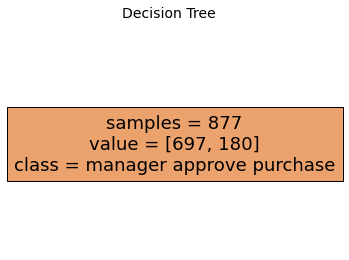

In [8]:
print("Decision point: ", decision_points[2])
dt_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

### Neural Network

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


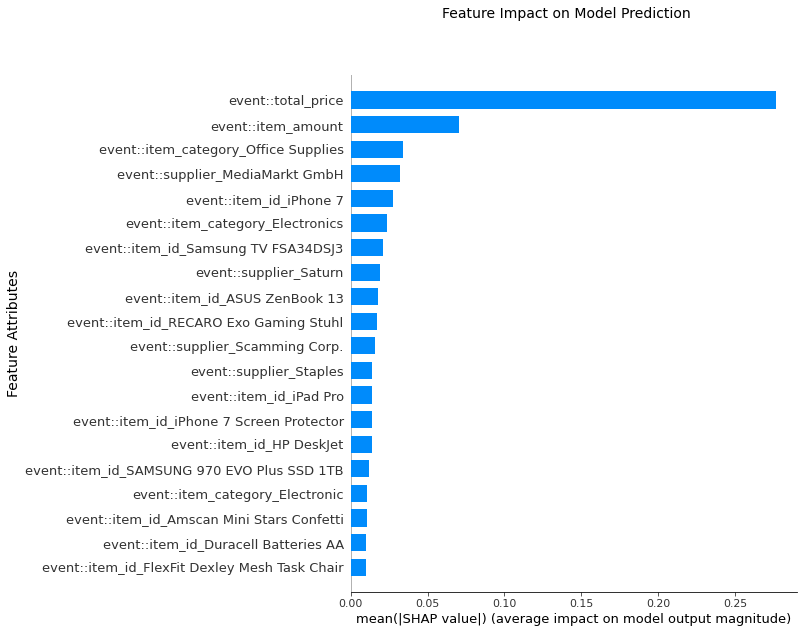

In [9]:
print("Decision point: ", decision_points[0])
nn_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_points[0]].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_points[0]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


100%|██████████| 100/100 [00:40<00:00,  2.46it/s]


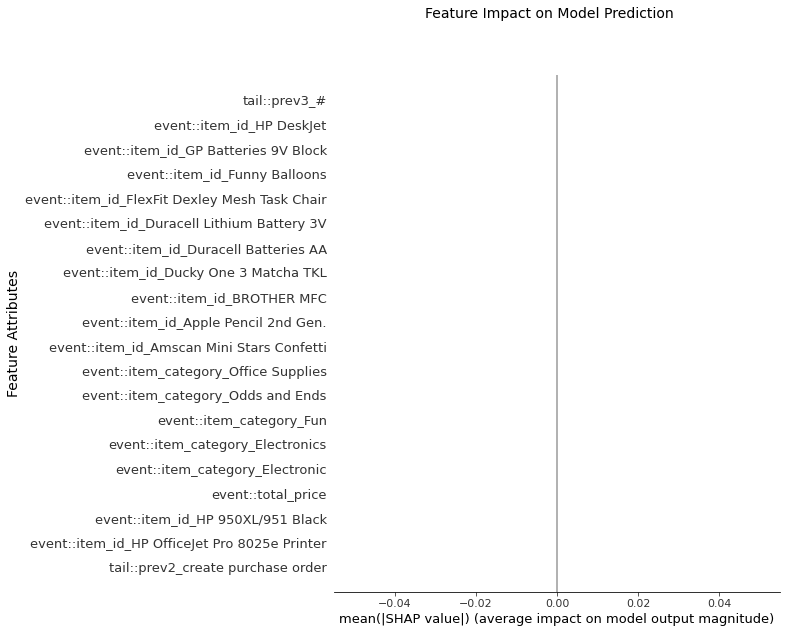

In [10]:
print("Decision point: ", decision_points[1])
nn_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_points[1]].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_points[1]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


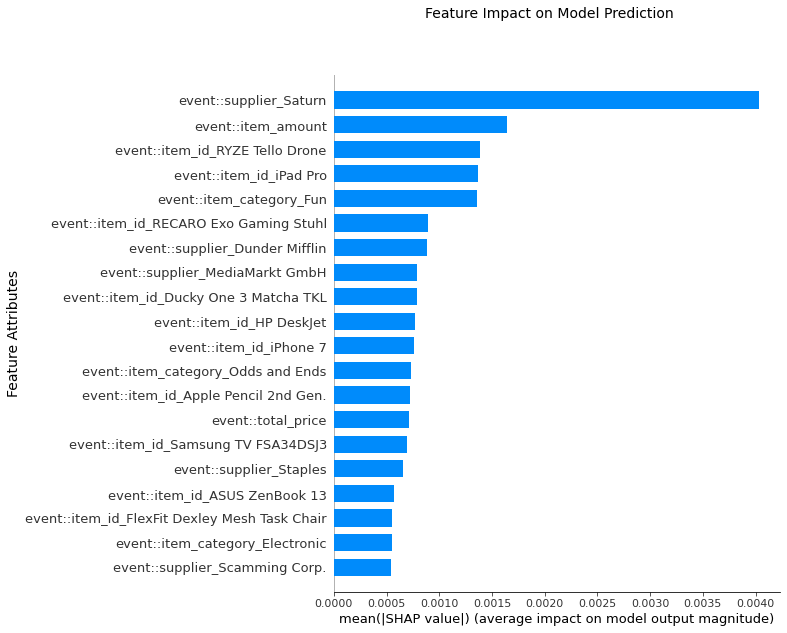

In [11]:
print("Decision point: ", decision_points[2])
nn_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_points[2]].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_points[2]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

### Support Vector Machine

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


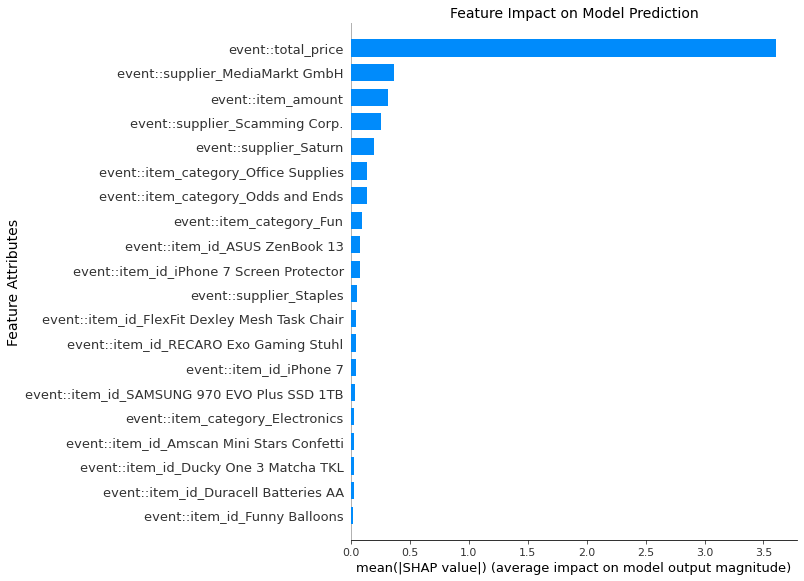

In [12]:
print("Decision point: ", decision_points[0])
svm_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[0]].X_test)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


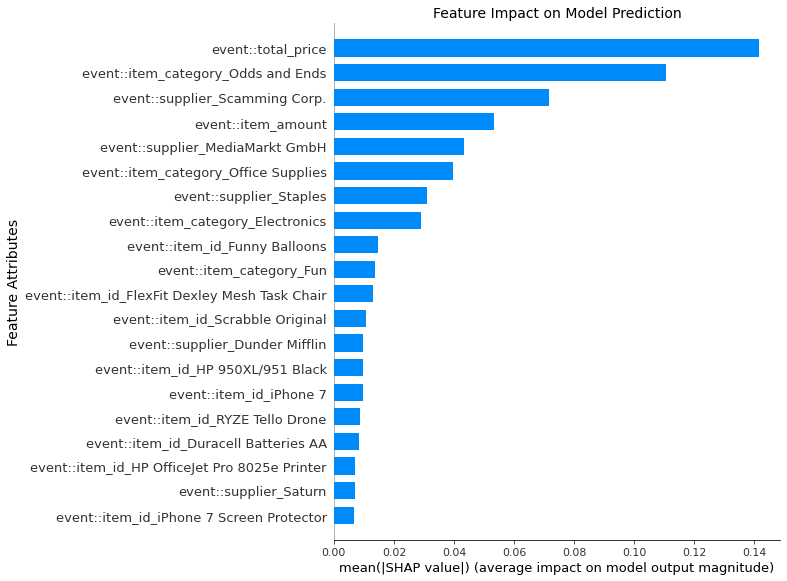

In [13]:
print("Decision point: ", decision_points[1])
svm_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[1]].X_test)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


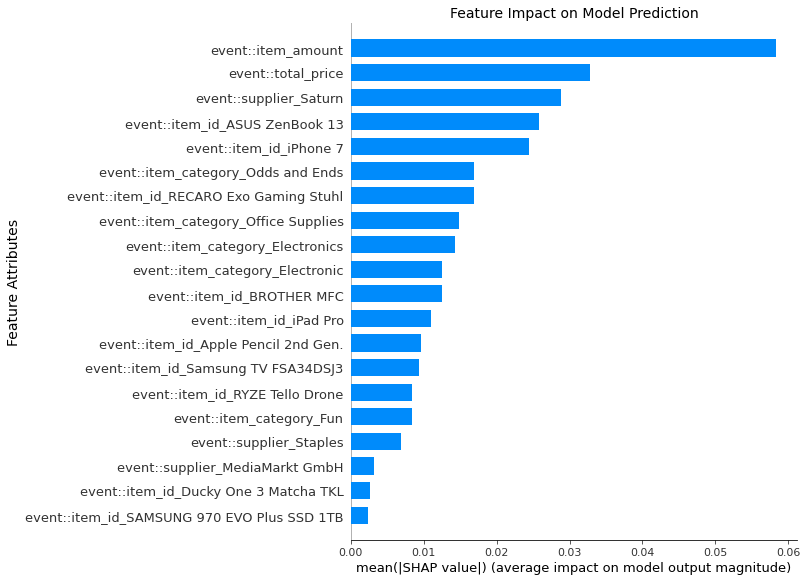

In [14]:
print("Decision point: ", decision_points[2])
svm_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[2]].X_test)

### Logistic Regression

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


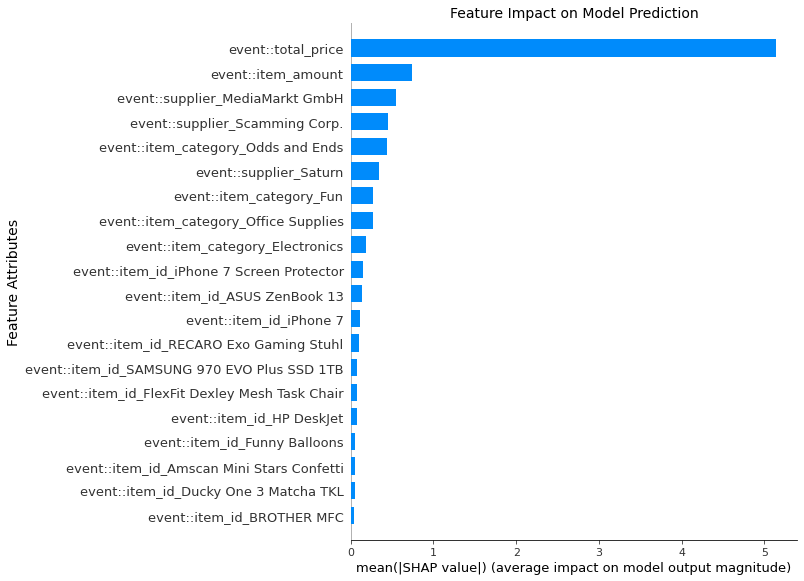

In [15]:
print("Decision point: ", decision_points[0])
lr_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[0]].X_test)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


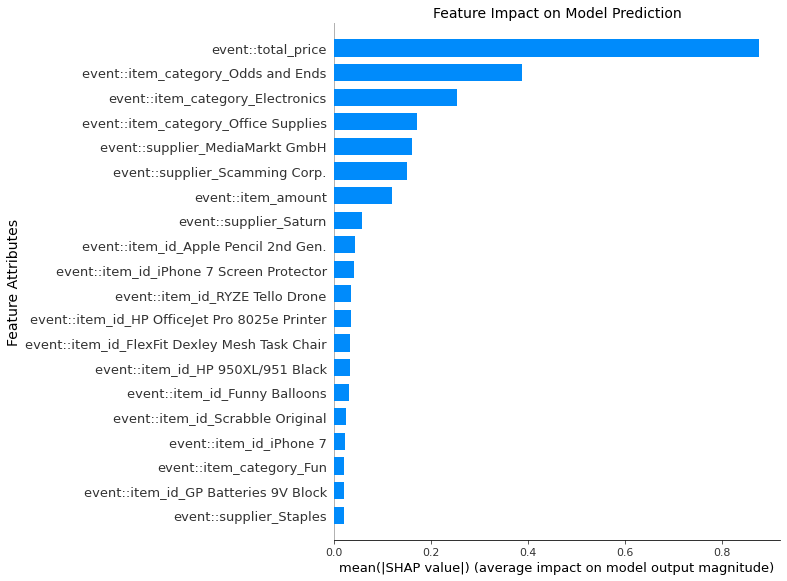

In [16]:
print("Decision point: ", decision_points[1])
lr_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[1]].X_test)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


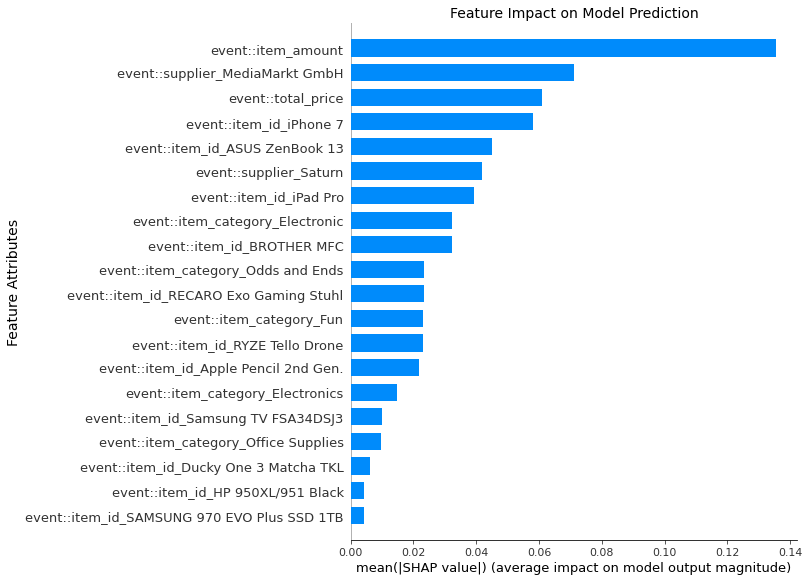

In [17]:
print("Decision point: ", decision_points[2])
lr_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[2]].X_test)

### Summary Event Log with some Randomness: - needs to be update when implementations are all done -

- Request Manager or Standard Approval:  
All machine learning techniques are able to model the true underlying guard. The Decision Tree splits the data at total_price <= 1002 to classify the data samples. For the other three machine learning techniques total_price has by far the largest impact on the model prediction. We notice the SHAP values for Support Vector Machine and Logistic Regression to be much higher than for Neural Network.

- Manager Rejection or Approval:  
Some machine learning techniques have problems modeling the true underlying guard. We can see that the Support Vector Machine guard and Logistic Regression guard total_price is within the top three feature attributes with the most impact on the model. We also notice that item_amount is the attribute with the highest impact, item_amount is correlated with total_price. The Neural Network guard seems to pick up noise instead of the true underlying guard. The SHAP values of all three techniques are rather small. The Decision Tree guard assigns all samples to the same class label, which could be due to one of the stop criteria the Decision Tree Classifier uses, since the data at the decision point is quite unbalanced.

- Standard Rejection or Approval:  
Again some techniques struggle to model the true underlying guard. For the Logistic Regression guard and the Support Vector Machine guard total_price is the feature attribute with the highest impact, all SHAP values are rather small. For the Neural Network guard all feature attributes only have a very small impact on the model prediction, thus the plot is empty. The Decision Tree guard assigns all samples to the same class label, which could be due to one of the stop criteria the Decision Tree Classifier uses, since the data at the decision point is unbalanced.

Overall, all machine learning techniques have their problems modeling the true underlying behavior of the guard if the decisions are partly random. Nevertheless all four machine learning guards achieve high performance scores measures using F1-score as seen in the comparision plots. The F1-score for the decision point Manager Rejection or Approval is for all techniques lower than for the decision point Standard Rejection or Approval, eventhough they are based on the same underlying guard.